In [135]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

1. Load the Data

In [136]:
file_path = '/Users/jingao/Desktop/info_visual_Jingao/sf_trees.csv'
df = pd.read_csv(file_path)

/var/folders/mt/n7f_7dc9793602rk6vb3_4rm0000gn/T/ipykernel_44239/2699037970.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2. Check Columns and Rows

In [137]:
rows, columns = df.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 192987 rows and 12 columns.


3. Look at the First 10 Rows

In [138]:
first_10_rows = df.head(10)
first_10_rows

,tree_id,legal_status,species,address,site_order,site_info,caretaker,date,dbh,plot_size,latitude,longitude
0,53719,Permitted Site,Tree(s) ::,2963 Webster St,1.0,Sidewalk: Curb side : Cutout,Private,1955-09-19,NaN,NaN,37.797869,-122.434054
1,30313,Permitted Site,Tree(s) ::,501 Arkansas St,3.0,Sidewalk: Curb side : Cutout,Private,1955-10-20,NaN,NaN,37.759838,-122.398119
2,30312,Permitted Site,Tree(s) ::,501 Arkansas St,2.0,Sidewalk: Curb side : Cutout,Private,1955-10-20,NaN,NaN,37.759838,-122.398119
3,30314,DPW Maintained,Pittosporum undulatum :: Victorian Box,501 Arkansas St,1.0,Sidewalk: Curb side : Cutout,Private,1955-10-20,16.0,NaN,37.759772,-122.398109
4,30315,Permitted Site,Acacia melanoxylon :: Blackwood Acacia,1190 Sacramento St,5.0,Sidewalk: Curb side : Cutout,Private,1955-10-24,NaN,NaN,37.792650,-122.412449
5,30316,Permitted Site,Acacia melanoxylon :: Blackwood Acacia,1190 Sacramento St,6.0,Sidewalk: Curb side : Cutout,Private,1955-10-24,NaN,NaN,37.792650,-122.412449
6,48435,Permitted Site,Tree(s) ::,1190 Sacramento St,4.0,Sidewalk: Curb side : Cutout,Private,1955-10-24,NaN,NaN,37.792650,-122.412449
7,30319,Permitted Site,Magnolia grandiflora :: Southern Magnolia,867 25th Ave,2.0,Sidewalk: Curb side : Cutout,Private,1955-12-13,NaN,NaN,37.773194,-122.484328
8,30318,Permitted Site,Magnolia grandiflora :: Southern Magnolia,867 25th Ave,1.0,Sidewalk: Curb side : Cutout,Private,1955-12-13,NaN,NaN,37.773194,-122.484328
9,30320,Permitted Site,Corymbia ficifolia :: Red Flowering Gum,867 25th Ave,3.0,Sidewalk: Curb side : Cutout,Private,1955-12-13,NaN,NaN,37.773194,-122.484328


4. Check Unique Values in Each Column

In [139]:
unique_values = df.nunique()
print(unique_values)

tree_id         192987
legal_status         9
species            571
address          85909
site_order         311
site_info           31
caretaker           22
date              7404
dbh                109
plot_size          524
latitude        162454
longitude       162388
dtype: int64


5. Extracting the unique values for each column in the dataset

In [140]:
unique_values_per_column = {column: df[column].unique() for column in df.columns}
unique_values_per_column

{'tree_id': array([ 53719,  30313,  30312, ...,  17192, 228173, 121713]),
 'legal_status': array(['Permitted Site', 'DPW Maintained', 'Undocumented',
        'Planning Code 138.1 required', 'Significant Tree',
        'Landmark tree', 'Section 143', 'Private', nan, 'Property Tree'],
       dtype=object),
 'species': array(['Tree(s) ::', 'Pittosporum undulatum :: Victorian Box',
        'Acacia melanoxylon :: Blackwood Acacia',
        'Magnolia grandiflora :: Southern Magnolia',
        'Corymbia ficifolia :: Red Flowering Gum',
        'Ginkgo biloba :: Maidenhair Tree',
        "Arbutus 'Marina' :: Hybrid Strawberry Tree",
        'Platanus x hispanica :: Sycamore: London Plane',
        'Acacia longifolia :: Golden Wattle',
        'Ulmus parvifolia :: Chinese Elm', 'Persea americana :: Avocado',
        'Cercis occidentalis :: Western Redbud',
        'Maytenus boaria :: Mayten',
        'Fraxinus uhdei :: Shamel Ash: Evergreen Ash',
        "Ficus microcarpa nitida 'Green Gem' :: 

6. Clean data: Keep only the specified columns

In [141]:
df_extract_column = df[['species', 'date', 'latitude', 'longitude']]
df_extract_column.head()

,species,date,latitude,longitude
0,Tree(s) ::,1955-09-19,37.797869,-122.434054
1,Tree(s) ::,1955-10-20,37.759838,-122.398119
2,Tree(s) ::,1955-10-20,37.759838,-122.398119
3,Pittosporum undulatum :: Victorian Box,1955-10-20,37.759772,-122.398109
4,Acacia melanoxylon :: Blackwood Acacia,1955-10-24,37.792650,-122.412449


In [142]:
rows_with_null = df_extract_column[df_extract_column.isnull().any(axis=1)]
rows_with_null

,species,date,latitude,longitude
39,Corymbia ficifolia :: Red Flowering Gum,1956-02-17,NaN,NaN
95,Magnolia grandiflora :: Southern Magnolia,1956-05-11,NaN,NaN
165,Tree(s) ::,1956-09-05,NaN,NaN
166,Tree(s) ::,1956-09-05,NaN,NaN
167,Tree(s) ::,1956-09-05,NaN,NaN
...,...,...,...,...
192982,::,NaN,37.753839,-122.399069
192983,Pittosporum undulatum :: Victorian Box,NaN,37.749267,-122.442046
192984,Magnolia grandiflora :: Southern Magnolia,NaN,37.792795,-122.427894
192985,Lophostemon confertus :: Brisbane Box,NaN,37.759348,-122.410957


In [143]:
null_values = df_extract_column.isnull().sum()
null_values


species           0
date         124610
latitude       2832
longitude      2832
dtype: int64

In [144]:
# Removing rows with any null values
df_no_null_column = df_extract_column.dropna()
null_values = df_no_null_column.isnull().sum()
null_values

species      0
date         0
latitude     0
longitude    0
dtype: int64

In [145]:
rows, columns = df_no_null_column.shape
rows, columns

(66448, 4)

In [146]:
df_no_null_column.head()

,species,date,latitude,longitude
0,Tree(s) ::,1955-09-19,37.797869,-122.434054
1,Tree(s) ::,1955-10-20,37.759838,-122.398119
2,Tree(s) ::,1955-10-20,37.759838,-122.398119
3,Pittosporum undulatum :: Victorian Box,1955-10-20,37.759772,-122.398109
4,Acacia melanoxylon :: Blackwood Acacia,1955-10-24,37.792650,-122.412449


In [147]:
df_no_null_column_copy = df_no_null_column[['species', 'date', 'latitude', 'longitude']].copy()

# Splitting the 'species' column at "::" and retaining only the common name
# If there's no common name (empty string after split), replace with 'Other Tree'
df_no_null_column_copy['species'] = df_no_null_column_copy['species'].str.split(' :: ').str.get(1).fillna('Other Tree')
# Displaying the first few rows to verify the changes
df_no_null_column_copy.head()

,species,date,latitude,longitude
0,Other Tree,1955-09-19,37.797869,-122.434054
1,Other Tree,1955-10-20,37.759838,-122.398119
2,Other Tree,1955-10-20,37.759838,-122.398119
3,Victorian Box,1955-10-20,37.759772,-122.398109
4,Blackwood Acacia,1955-10-24,37.792650,-122.412449


In [148]:
species_counts = df_no_null_column_copy['species'].value_counts()
species_counts.head(50)

species
Other Tree                            9637
Brisbane Box                          4030
Swamp Myrtle                          3500
Hybrid Strawberry Tree                3162
Cherry Plum                           2582
Southern Magnolia                     2299
New Zealand Xmas Tree                 2248
Victorian Box                         2019
Sycamore: London Plane                1749
Ornamental Cherry                     1738
Kwanzan Flowering Cherry              1443
Mayten                                1399
Maidenhair Tree                       1290
Bronze Loquat                         1275
Olive Tree                            1230
Small-leaf Tristania 'Elegant'        1129
Ornamental Pear                       1051
Evergreen Pear                         948
Cajeput                                925
Indian Laurel Fig Tree 'Green Gem'     742
Primrose Tree                          630
Lemon Bottlebrush                      615
Jacaranda                              564
Ind

In [149]:
df_no_null_column_copy_filtered = df_no_null_column_copy[df_no_null_column_copy['species'] != 'Other Tree']
df_no_null_column_copy_filtered['species'] .value_counts()

species
Brisbane Box                    4030
Swamp Myrtle                    3500
Hybrid Strawberry Tree          3162
Cherry Plum                     2582
Southern Magnolia               2299
                                ... 
Pomegranate Tree 'Wonderful'       1
Silver Mountain Gum Tree           1
Manchurian snakebark maple         1
Tree Of Heaven                     1
Taiwan Flowering Cherry            1
Name: count, Length: 410, dtype: int64

In [150]:
unique_value_counts = df_no_null_column_copy_filtered['date'].value_counts()
unique_value_counts

date
2000-06-23    313
2000-06-26    225
2000-06-21    218
1998-05-18    198
2000-06-20    179
             ... 
1990-01-30      1
2004-02-03      1
1972-05-17      1
1990-01-31      1
1955-10-20      1
Name: count, Length: 6614, dtype: int64

In [151]:
df_no_null_column_copy_filtered['decade'] = (df_no_null_column_copy_filtered['date'].str[:3] + '0s').astype(str)
df_no_null_column_copy_filtered.head()

/var/folders/mt/n7f_7dc9793602rk6vb3_4rm0000gn/T/ipykernel_44239/3810583155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null_column_copy_filtered['decade'] = (df_no_null_column_copy_filtered['date'].str[:3] + '0s').astype(str)


,species,date,latitude,longitude,decade
3,Victorian Box,1955-10-20,37.759772,-122.398109,1950s
4,Blackwood Acacia,1955-10-24,37.792650,-122.412449,1950s
5,Blackwood Acacia,1955-10-24,37.792650,-122.412449,1950s
7,Southern Magnolia,1955-12-13,37.773194,-122.484328,1950s
8,Southern Magnolia,1955-12-13,37.773194,-122.484328,1950s


In [152]:
species_counts = df_no_null_column_copy_filtered['species'].value_counts()
species_over_1000 = species_counts[species_counts > 1000]
species_over_1000

species
Brisbane Box                      4030
Swamp Myrtle                      3500
Hybrid Strawberry Tree            3162
Cherry Plum                       2582
Southern Magnolia                 2299
New Zealand Xmas Tree             2248
Victorian Box                     2019
Sycamore: London Plane            1749
Ornamental Cherry                 1738
Kwanzan Flowering Cherry          1443
Mayten                            1399
Maidenhair Tree                   1290
Bronze Loquat                     1275
Olive Tree                        1230
Small-leaf Tristania 'Elegant'    1129
Ornamental Pear                   1051
Name: count, dtype: int64

In [166]:
# 创建包含特定树种名称的列表
selected_species = [
    "Brisbane Box", "Swamp Myrtle", "Hybrid Strawberry Tree", "Cherry Plum",
    "Southern Magnolia", "New Zealand Xmas Tree", "Victorian Box",
    "Sycamore: London Plane", "Ornamental Cherry", "Kwanzan Flowering Cherry",
    "Mayten", "Maidenhair Tree", "Bronze Loquat", "Olive Tree",
    "Small-leaf Tristania 'Elegant'", "Ornamental Pear"
]

# 筛选原始 DataFrame 以保留只包含这些树种的行
df_filtered_selected_species = df_no_null_column_copy_filtered[
    df_no_null_column_copy_filtered['species'].isin(selected_species)
]

df_filtered_selected_species

,species,date,latitude,longitude,decade
3,Victorian Box,1955-10-20,37.759772,-122.398109,1950s
7,Southern Magnolia,1955-12-13,37.773194,-122.484328,1950s
8,Southern Magnolia,1955-12-13,37.773194,-122.484328,1950s
10,Southern Magnolia,1956-01-06,37.795718,-122.441860,1950s
15,Southern Magnolia,1956-01-24,37.761144,-122.395507,1950s
...,...,...,...,...,...
68366,Swamp Myrtle,2020-01-25,37.776362,-122.501584,2020s
68369,Bronze Loquat,2020-01-25,37.776287,-122.502654,2020s
68373,Swamp Myrtle,2020-01-25,37.774642,-122.501452,2020s
68374,Brisbane Box,2020-01-25,37.776940,-122.502697,2020s


In [168]:
species_counts = df_filtered_selected_species['species'].value_counts()
species_counts

species
Brisbane Box                      4030
Swamp Myrtle                      3500
Hybrid Strawberry Tree            3162
Cherry Plum                       2582
Southern Magnolia                 2299
New Zealand Xmas Tree             2248
Victorian Box                     2019
Sycamore: London Plane            1749
Ornamental Cherry                 1738
Kwanzan Flowering Cherry          1443
Mayten                            1399
Maidenhair Tree                   1290
Bronze Loquat                     1275
Olive Tree                        1230
Small-leaf Tristania 'Elegant'    1129
Ornamental Pear                   1051
Name: count, dtype: int64

In [169]:
# Save the cleaned data to a new CSV file
df_filtered_selected_species.to_csv('sf_trees_cleaned.csv', index=False)

6.match tree location to San Francisco area.

In [155]:
df_trees = pd.read_csv('sf_trees_cleaned.csv')
gdf_areas = gpd.read_file('san-francisco-ca_.geojson')

In [156]:
# 步骤 3: 将树木数据转换为地理数据
gdf_trees = gpd.GeoDataFrame(df_trees, geometry=gpd.points_from_xy(df_trees.longitude, df_trees.latitude))

# 确保两个 GeoDataFrame 使用相同的坐标参考系统
gdf_trees.crs = gdf_areas.crs

# 步骤 4: 空间连接 - 将每棵树匹配到其所在的地区
gdf_joined = gpd.sjoin(gdf_trees, gdf_areas, how="inner", op="within")

# 查看结果
gdf_joined['name'].value_counts()

/Users/jingao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


name
Western Addition         2412
Mission                  2154
Bayview                  1998
South of Market          1848
Inner Richmond           1834
Outer Richmond           1758
Outer Sunset             1602
Bernal Heights           1534
Excelsior                1141
Outer Mission            1130
Parkside                 1102
Noe Valley               1100
West of Twin Peaks       1075
Inner Sunset             1061
Potrero Hill              989
Ocean View                987
Castro/Upper Market       961
Downtown/Civic Center     891
Haight Ashbury            849
Pacific Heights           809
Marina                    756
Financial District        503
North Beach               465
Russian Hill              458
Presidio Heights          456
Lakeshore                 447
Visitacion Valley         442
Glen Park                 375
Nob Hill                  353
Crocker Amazon            309
Seacliff                  116
Diamond Heights            72
Twin Peaks                 66
China

In [157]:
gdf_joined

,species,date,latitude,longitude,decade,geometry,index_right,name,cartodb_id,created_at,updated_at
0,Victorian Box,1955-10-20,37.759772,-122.398109,1950s,POINT (-122.39811 37.75977),16,Potrero Hill,32,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00
4,Southern Magnolia,1956-01-24,37.761144,-122.395507,1950s,POINT (-122.39551 37.76114),16,Potrero Hill,32,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00
10,Victorian Box,1956-02-16,37.759006,-122.398029,1950s,POINT (-122.39803 37.75901),16,Potrero Hill,32,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00
11,Victorian Box,1956-02-16,37.760901,-122.398403,1950s,POINT (-122.39840 37.76090),16,Potrero Hill,32,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00
12,Victorian Box,1956-02-16,37.759473,-122.398073,1950s,POINT (-122.39807 37.75947),16,Potrero Hill,32,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00
...,...,...,...,...,...,...,...,...,...,...,...
9476,New Zealand Xmas Tree,1997-06-05,37.765238,-122.496210,1990s,POINT (-122.49621 37.76524),28,Golden Gate Park,28,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00
17089,Brisbane Box,2002-11-08,37.766251,-122.464348,2000s,POINT (-122.46435 37.76625),28,Golden Gate Park,28,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00
17091,Brisbane Box,2002-11-08,37.766251,-122.464348,2000s,POINT (-122.46435 37.76625),28,Golden Gate Park,28,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00
17092,Brisbane Box,2002-11-08,37.766251,-122.464348,2000s,POINT (-122.46435 37.76625),28,Golden Gate Park,28,2013-02-10 05:44:04.653000+00:00,2013-02-10 05:44:04.923000+00:00


In [158]:
gdf_joined.columns

Index(['species', 'date', 'latitude', 'longitude', 'decade', 'geometry',
       'index_right', 'name', 'cartodb_id', 'created_at', 'updated_at'],
      dtype='object')

In [159]:
# Selecting only the desired columns
columns_to_keep = ['species', 'date', 'latitude', 'longitude', 'decade', 'geometry', 'name']
df_selected = gdf_joined[columns_to_keep]

# Saving the selected data to a new CSV file
df_selected.to_csv('selected_data.csv', index=False)

In [160]:
unique_species_count = df_selected['species'].nunique()
unique_species_count

16

In [161]:
total_trees_count = len(df_selected)


In [162]:
# Calculating the number of trees per area
trees_per_area = gdf_joined.groupby('name')['species'].count()

# Calculating the tree species diversity per area
# This is the number of unique species per area
species_diversity_per_area = gdf_joined.groupby('name')['species'].nunique()

# Creating a new DataFrame for the scatter plot data
plot_data = pd.DataFrame({
    'TreesCount': trees_per_area,
    'SpeciesDiversity': species_diversity_per_area
}).reset_index()

# Viewing the first few rows of the plot data
print(plot_data.head())

                  name  TreesCount  SpeciesDiversity
0              Bayview        1998                16
1       Bernal Heights        1534                16
2  Castro/Upper Market         961                16
3            Chinatown          49                11
4       Crocker Amazon         309                16


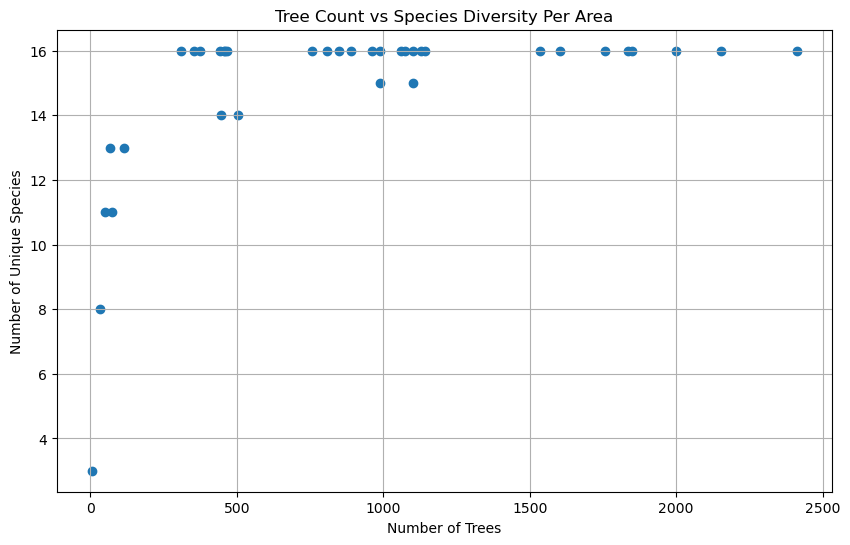

In [163]:
import matplotlib.pyplot as plt

# 假设 plot_data 是您之前创建的包含 TreesCount 和 SpeciesDiversity 的 DataFrame

plt.figure(figsize=(10, 6))
plt.scatter(plot_data['TreesCount'], plot_data['SpeciesDiversity'])
plt.title('Tree Count vs Species Diversity Per Area')
plt.xlabel('Number of Trees')
plt.ylabel('Number of Unique Species')
plt.grid(True)
plt.show()
